In [1]:
using GazeDispersion

In [3]:
pwd()

"e:\\PROJ\\GazeDispersion examples\\notebooks"

In [6]:
data_path = abspath("..\\data\\")

"e:\\PROJ\\GazeDispersion examples\\data\\"

In [7]:
cd(data_path)

In [8]:
fls = readdir(data_path)

2-element Array{ByteString,1}:
 "testdata_viewing1.csv"
 "testdata_viewing2.csv"

In [9]:
using DataFrames

In [12]:
et1 = readtable(fls[1], separator=';')
head(et1)

,X,Y
1,858,602
2,832,603
3,831,614
4,836,608
5,835,601
6,828,596


# Plot some data

In [15]:
using PyPlot

In [21]:
# check NAs
where_na = isna(et1[:X]) | isna(et1[:Y])

40242-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
  true
  true
  true

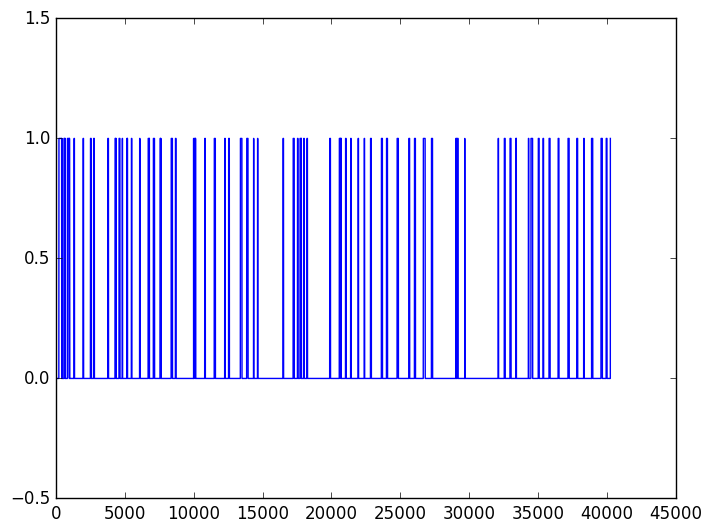

(-0.5,1.5)

In [23]:
plot(where_na)
ylim([-0.5, 1.5])

In [24]:
# check how much data was lost:
println("lost about $(mean(where_na))% of data")

lost about 0.10851846329705284% of data


In [26]:
println("Whoa, 10% data lost (eyeblinks mostly)")

Whoa, 10% data lost (eyeblinks mostly)


In [29]:
# temporarily - just take rows without missing data:
et = et1[~where_na, :];

In [30]:
# then turn et1 to regular Array
et = convert(Array{Int,2}, et)

35875x2 Array{Int64,2}:
  858   602
  832   603
  831   614
  836   608
  835   601
  828   596
  835   610
  878   606
  839   599
  844   601
  828   609
  884   610
  889   600
    ⋮      
  899   749
  897   744
  898   765
  892   737
  905   727
  909   751
  896   786
  877   865
  858   950
  852  1021
  877  1006
 1024  1120

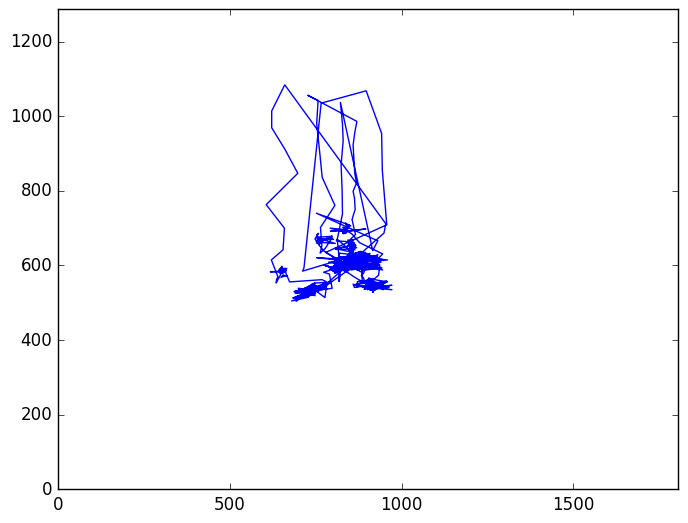

(0,1805)

In [33]:
screen_x = [0, maximum(et[:,1])]
screen_y = [0, maximum(et[:,2])]

plot(et[1:1000,1], et[1:1000,2])
ylim(screen_y)
xlim(screen_x)

In [37]:
function plot_et(data)
    plot(data[:,1], data[:,2])
    ylim(screen_y)
    xlim(screen_x)
end

plot_et (generic function with 1 method)

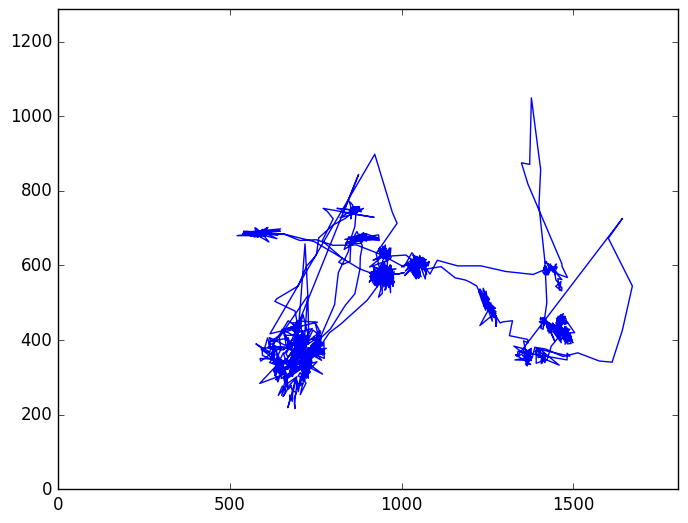

(0,1805)

In [38]:
plot_et(et[5000:7500,:])

# Compute gaze dispersion

In [40]:
# create window (width and step in ms) assuming sampling rate of 1000 Hz
wnd = win(0.25, 0.05, sf=1000)
wnd

GazeDispersion.sample_window(1,250,50)

In [43]:
# currently gaze disperion assumes float data
# so we convert to float
et = convert(Array{Float64, 2}, et)

35875x2 Array{Float64,2}:
  858.0   602.0
  832.0   603.0
  831.0   614.0
  836.0   608.0
  835.0   601.0
  828.0   596.0
  835.0   610.0
  878.0   606.0
  839.0   599.0
  844.0   601.0
  828.0   609.0
  884.0   610.0
  889.0   600.0
    ⋮          
  899.0   749.0
  897.0   744.0
  898.0   765.0
  892.0   737.0
  905.0   727.0
  909.0   751.0
  896.0   786.0
  877.0   865.0
  858.0   950.0
  852.0  1021.0
  877.0  1006.0
 1024.0  1120.0

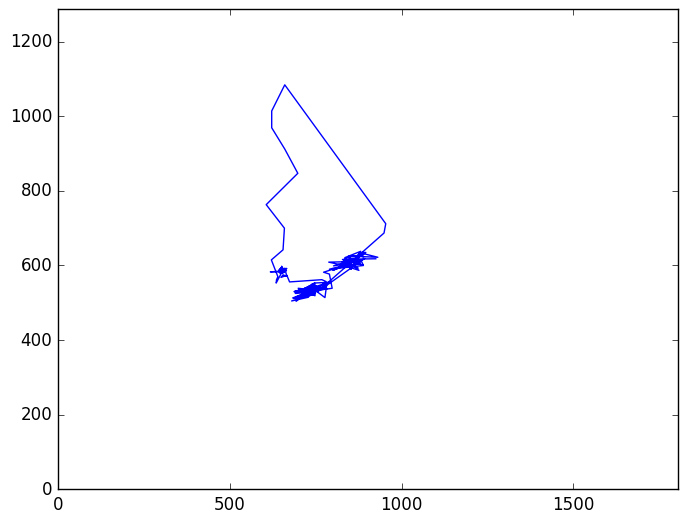

(0,1805)

In [45]:
dt = GazeDispersion.get_data(et, wnd)
plot_et(dt)

In [46]:
dsp = dispersion_within(et, wnd)

713-element Array{Float64,1}:
 114.866 
 125.405 
 131.099 
 128.408 
  93.3237
  66.6694
  77.2859
  84.8141
  86.5041
  93.7239
  86.5722
  49.042 
  71.5249
   ⋮     
 198.982 
 239.338 
 207.141 
 186.172 
 199.667 
 256.612 
 219.889 
 206.662 
 185.788 
 172.332 
 177.849 
 140.484 

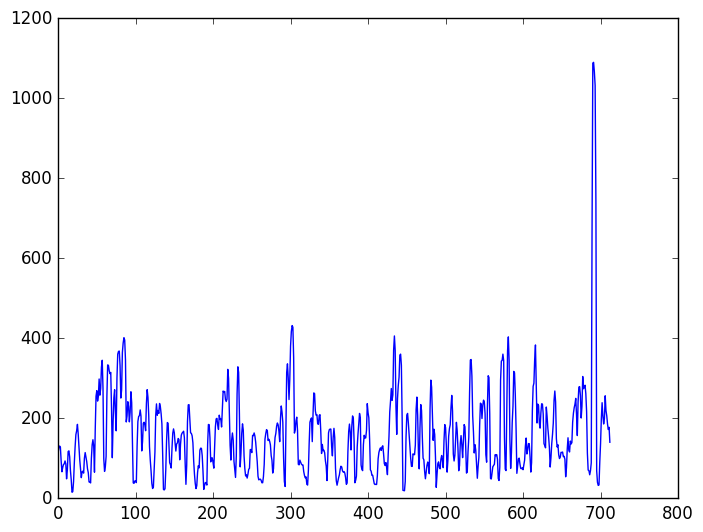

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000028994E10>

In [47]:
plot(dsp)

Currently the dispersion measure doesn't make much sense - we have only one subject and we are looking only at the first viewing

# Compare viewing 1 and 2

In [50]:
et2 = readtable(fls[2], separator=';')
head(et2)

,X,Y
1,917,685
2,924,672
3,926,677
4,924,678
5,918,681
6,926,690


In [51]:
# check out missing data
where_na = find(where_na)
where_na[1:6]

6-element Array{Int64,1}:
 213
 214
 215
 216
 217
 218

In [53]:
et1[213:218, :]

,X,Y
1,NA,NA
2,NA,NA
3,NA,NA
4,NA,NA
5,NA,NA
6,NA,NA


In [55]:
typeof(et1[213,1])

DataArrays.NAtype

In [56]:
et1[where_na, :] = NaN

LoadError: LoadError: InexactError()
while loading In[56], in expression starting on line 1

In [63]:
et1 = convert(Array{Float64,2}, [et1.columns[1] et1.columns[2]], -1.)

40242x2 Array{Float64,2}:
  858.0   602.0
  832.0   603.0
  831.0   614.0
  836.0   608.0
  835.0   601.0
  828.0   596.0
  835.0   610.0
  878.0   606.0
  839.0   599.0
  844.0   601.0
  828.0   609.0
  884.0   610.0
  889.0   600.0
    ⋮          
  892.0   737.0
  905.0   727.0
  909.0   751.0
  896.0   786.0
  877.0   865.0
  858.0   950.0
  852.0  1021.0
  877.0  1006.0
 1024.0  1120.0
   -1.0    -1.0
   -1.0    -1.0
   -1.0    -1.0

In [64]:
# Acutally, maybe use NaNs:
et1[et1 .== -1] = NaN

NaN

In [65]:
et1

40242x2 Array{Float64,2}:
  858.0   602.0
  832.0   603.0
  831.0   614.0
  836.0   608.0
  835.0   601.0
  828.0   596.0
  835.0   610.0
  878.0   606.0
  839.0   599.0
  844.0   601.0
  828.0   609.0
  884.0   610.0
  889.0   600.0
    ⋮          
  892.0   737.0
  905.0   727.0
  909.0   751.0
  896.0   786.0
  877.0   865.0
  858.0   950.0
  852.0  1021.0
  877.0  1006.0
 1024.0  1120.0
  NaN     NaN  
  NaN     NaN  
  NaN     NaN  

In [66]:
# read second viewing
et2 = readtable(fls[2], separator=';')
et2 = convert(Array{Float64,2}, [et2.columns[1] et2.columns[2]], NaN)

40239x2 Array{Float64,2}:
 917.0  685.0
 924.0  672.0
 926.0  677.0
 924.0  678.0
 918.0  681.0
 926.0  690.0
 926.0  674.0
 920.0  677.0
 930.0  685.0
 922.0  676.0
 925.0  694.0
 921.0  675.0
 932.0  678.0
   ⋮         
 859.0  660.0
 858.0  655.0
 858.0  685.0
 843.0  675.0
 855.0  655.0
 844.0  665.0
 853.0  658.0
 858.0  686.0
 858.0  691.0
 856.0  666.0
 852.0  670.0
 851.0  655.0

In [68]:
# et1 is too long, trim
et1 = et1[1:size(et2, 1), :];

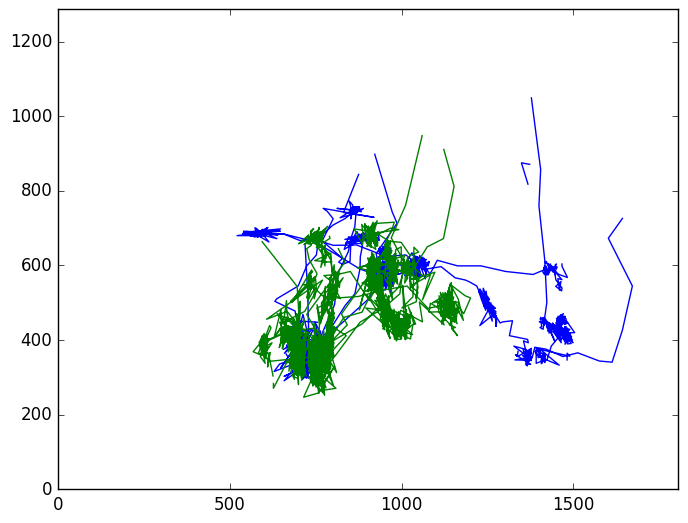

(0,1805)

In [70]:
rng = 6000:8500
plot_et(et1[rng,:])
plot_et(et2[rng,:])

looks quite similar, let's check `dispersion_across`

In [72]:
wnd.start = 1
wnd

GazeDispersion.sample_window(1,250,50)

In [73]:
dsp = dispersion_across(et1, et2, wnd)

LoadError: LoadError: BoundsError: attempt to access 40239x2 Array{Float64,2}:
  858.0   602.0
  832.0   603.0
  831.0   614.0
  836.0   608.0
  835.0   601.0
  828.0   596.0
  835.0   610.0
  878.0   606.0
  839.0   599.0
  844.0   601.0
  828.0   609.0
  884.0   610.0
  889.0   600.0
    ⋮          
  899.0   749.0
  897.0   744.0
  898.0   765.0
  892.0   737.0
  905.0   727.0
  909.0   751.0
  896.0   786.0
  877.0   865.0
  858.0   950.0
  852.0  1021.0
  877.0  1006.0
 1024.0  1120.0
  at index [40001:40250,Colon()]
while loading In[73], in expression starting on line 1

In [74]:
wnd.start = 1
win_steps = GazeDispersion.window_steps(et1, wnd)

801

In [77]:
(win_steps-1) * wnd.step

40000

In [79]:
function window_steps{T<:AbstractFloat}(et::Array{T,2},
    w::GazeDispersion.sample_window)
	return floor(Int, (size(et,1) - w.width) / w.step) + 1
end

window_steps (generic function with 1 method)

In [81]:
win_steps = window_steps(et1, wnd)

800